# import library

In [225]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Get MNIST Data.

split data to (train images, train labels) and (test images, test labels)

In [226]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

total 60000 train images, train labels.
shape of single image is 28 x 28

In [227]:
print('Shape of Train images : ',train_images.shape)
print('Shape of Train labels : ',train_labels.shape)
print('\nShape of Test images : ',test_images.shape)
print("Shape of Test labels : ",test_labels.shape)

Shape of Train images :  (60000, 28, 28)
Shape of Train labels :  (60000,)

Shape of Test images :  (10000, 28, 28)
Shape of Test labels :  (10000,)


In [228]:
print('Train labels : ',train_labels)

Train labels :  [5 0 4 ... 5 6 8]


# Plot first train image

when value is close to 0 : dark

when value is close to 255 : white

In [229]:
print(train_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

Plot first 10 train images and corresponding labels

first 10 train images in MNIST dataset



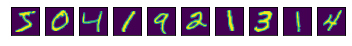


Train labels match with Train label sequentially
 [5 0 4 1 9 2 1 3 1 4]


In [230]:
print('first 10 train images in MNIST dataset\n')
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()
print('\nTrain labels match with Train label sequentially\n',train_labels[:10])

# Model selection

change data shape (60000 x 28 x 28) to (60000 x 28 x 28 x 1)

In [231]:
train_images = tf.reshape(train_images, [-1,28,28,1])
test_images = tf.reshape(test_images, [-1,28,28,1])

3,5,7 layer each

MODEL 1 : 3 Layers with 1 Convolution layer

MODEL 2 : 5 Layers with 2 Convolution layer

MODEL 3 : 7 Layers with 4 Convolution layer

In [232]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (28,28,1)), #layer 1
            keras.layers.MaxPool2D((2,2)), # layer 2
            keras.layers.Flatten(),
            keras.layers.Dense(10,activation = 'softmax')]) #layer 3
    
    elif model_number == 2:
        model = model_2 = keras.models.Sequential([
            keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)), # layer 1
            keras.layers.MaxPool2D((2,2)), # layer 2
            keras.layers.Conv2D(64,(3,3), activation = 'relu'), # layer 3
            keras.layers.MaxPool2D((2,2)), # layer 4
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation = 'softmax')]) # layer 5

    else:
        model = model_3 = keras.models.Sequential([
            keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)), # layer 1
            keras.layers.MaxPool2D((2,2)), # layer 2
            keras.layers.Conv2D(64,(3,3), activation = 'relu'), # layer 3
            keras.layers.Conv2D(64,(3,3), activation = 'relu'), # layer 4
            keras.layers.MaxPool2D((2,2)), # layer 5
            keras.layers.Conv2D(128,(3,3), activation = 'relu'), # layer 6
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation = 'softmax')]) # layer 7
        
    return model

In [233]:
model = select_model(1)

In [234]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


# Components in training step

Optimizer, Loss function, accuracy metrics

In [235]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Training Step

Training for 5 epoches.

In [236]:
model.fit(train_images,train_labels,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6906 - accuracy: 0.9406
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0860 - accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0695 - accuracy: 0.9786
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0630 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0555 - accuracy: 0.9832


# Test Step

Perform Test with Test data

In [237]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ',test_loss)
print('Test accuracy : ',accuracy)

313/313 - 1s - loss: 0.1094 - accuracy: 0.9733

Test loss :  0.10941503942012787
Test accuracy :  0.9732999801635742


Before prediction, change test image's type to float32

In [238]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

# Functions for plot images, probability

In [240]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                        100*np.max(predictions_array),
                                        Number[true_label]),
                                        color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    plt.xticks(Number)
    
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color('blue')

In [ ]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

# Show right predictions

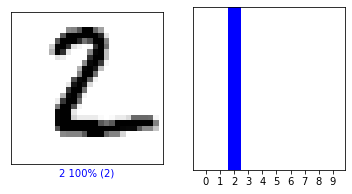

In [242]:
i =  1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,pred,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred, test_labels)
plt.show()

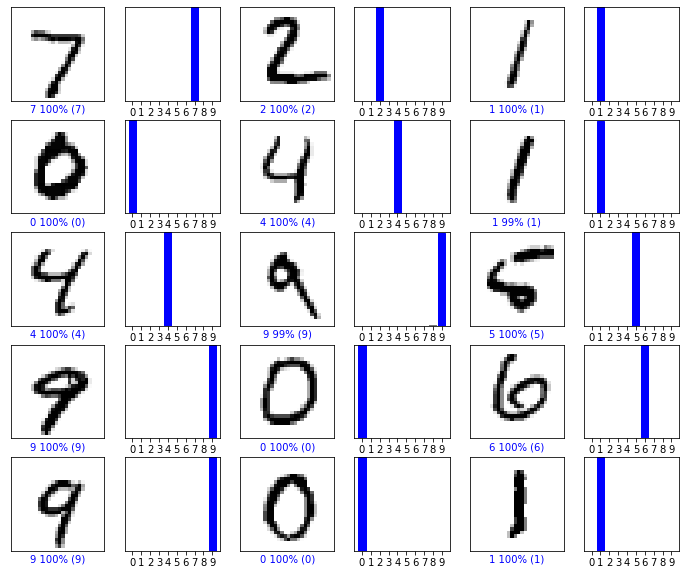

In [243]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()

# Plot images and probability that model predicted wrong

In [244]:
def error_mnist(prediction_array, true_label):
    error_index=[]
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index
    
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    
    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

Find index of wrong prediction

Plot first 10 wrong predicted images and probability

In [245]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[96, 151, 247, 259, 264, 282, 321, 324, 340, 381]


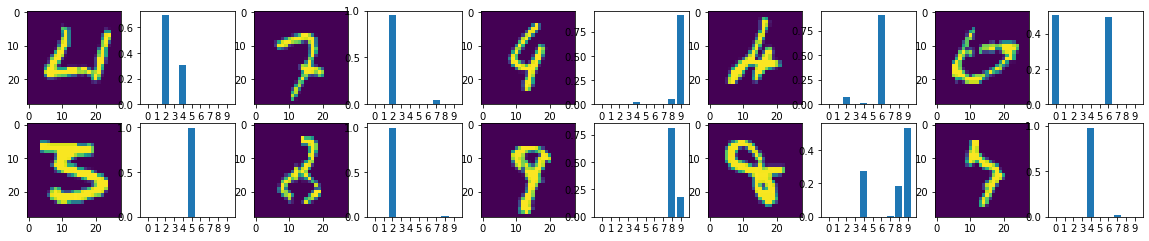

In [272]:
plot_error(index_slice,pred,test_labels)

# model 2

In [273]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [274]:
train_images = tf.reshape(train_images, [-1,28,28,1])
test_images = tf.reshape(test_images, [-1,28,28,1])

In [275]:
model = select_model(2)

# Components in training step

Optimizer, Loss function, accuracy metrics

In [276]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Training Step

Training for 5 epoches.

In [277]:
model.fit(train_images,train_labels,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3723 - accuracy: 0.9443
Epoch 2/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0732 - accuracy: 0.9786
Epoch 3/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0601 - accuracy: 0.9819
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0514 - accuracy: 0.9840
Epoch 5/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0431 - accuracy: 0.9870


# Test Step - accuracy

Perform Test with Test data

In [279]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ',test_loss)
print('Test accuracy : ',accuracy)

313/313 - 1s - loss: 0.0729 - accuracy: 0.9794

Test loss :  0.07292770594358444
Test accuracy :  0.9793999791145325


Before prediction, change test image's type to float32

In [280]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

In [282]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

# Show successful predictions

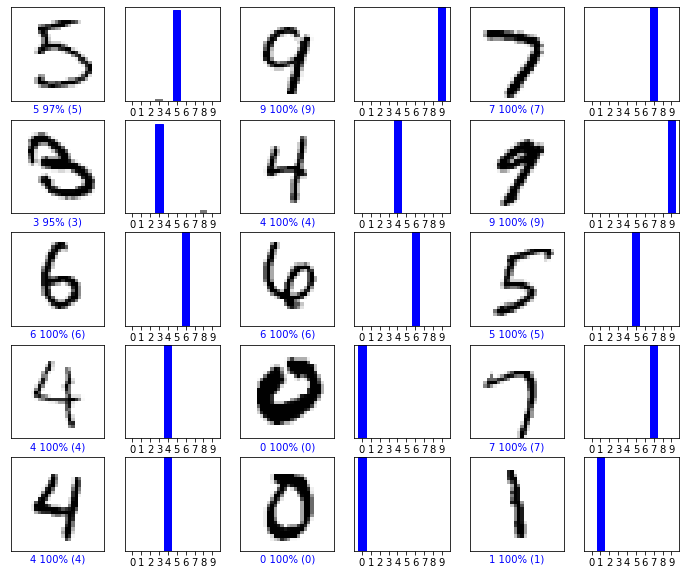

In [291]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+15, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+15, pred, test_labels)
plt.show()

# Plot images and probability that model predicted wrong

Find index of wrong prediction

Plot first 10 wrong predicted images and probability

In [284]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]

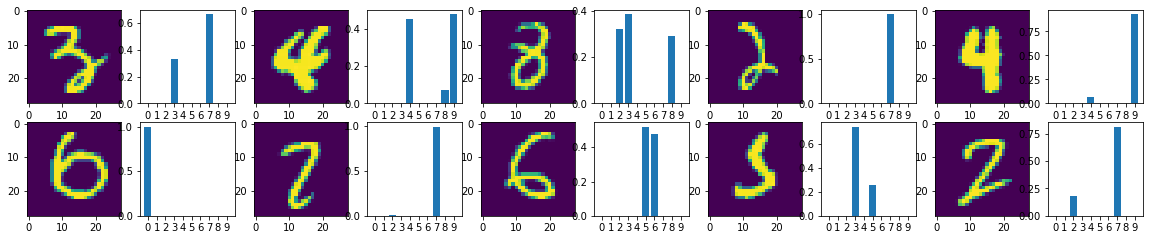

In [285]:
plot_error(index_slice,pred,test_labels)

# Model 3

In [292]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [293]:
train_images = tf.reshape(train_images, [-1,28,28,1])
test_images = tf.reshape(test_images, [-1,28,28,1])

In [294]:
model = select_model(3)

In [295]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [296]:
model.fit(train_images,train_labels,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1809 - accuracy: 0.9558
Epoch 2/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0548 - accuracy: 0.9827
Epoch 3/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0428 - accuracy: 0.9870
Epoch 4/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0382 - accuracy: 0.9886
Epoch 5/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0314 - accuracy: 0.9905


In [297]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ',test_loss)
print('Test accuracy : ',accuracy)

313/313 - 2s - loss: 0.0384 - accuracy: 0.9889

Test loss :  0.03837687522172928
Test accuracy :  0.9889000058174133


In [298]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

In [299]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

# Show right predictions

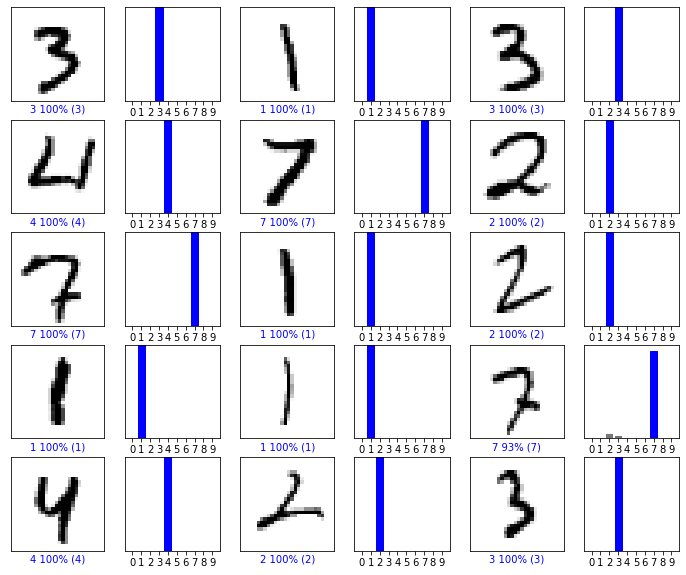

In [300]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+30, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+30, pred, test_labels)
plt.show()

# Plot images and probability that model predicted wrong

In [301]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[175, 247, 259, 412, 447, 449, 551, 582, 593, 619]


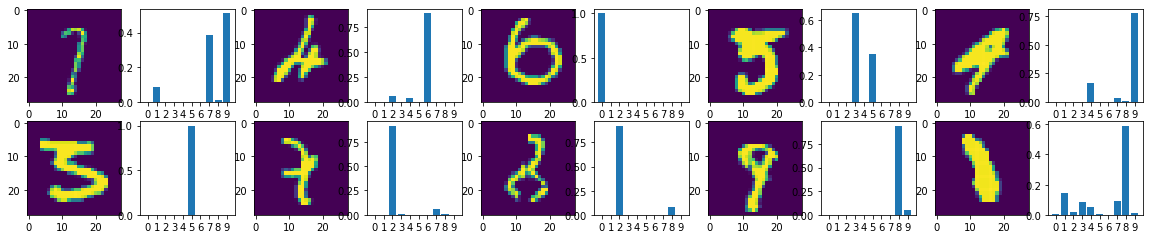

In [302]:
plot_error(index_slice,pred,test_labels)